In [1]:
# 경고 메세지가 안나오게..
import warnings
warnings.filterwarnings('ignore')

# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

# KFold
from sklearn.model_selection import KFold           # 랜덤하게 섞어서 자를 수도 있고, 순서대로 자를 수도 있음
from sklearn.model_selection import StratifiedKFold # 결과 데이터의 비율이 최대한 균등하게 들어갈 수 있도록!

# 교차검증 함수
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 학습 데이터와 검증 데이터로 나누는 함수
from sklearn.model_selection import train_test_split

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가함수
from sklearn.metrics import accuracy_score

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 딥러닝
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

# 다중분류를 위한 핫-윈 인코더
from keras.utils import to_categorical

# 저장된 딥러닝 모델을 복구하는 함수
from keras.models import load_model

# epoch마다 모델을 저장하는 함수
from keras.callbacks import ModelCheckpoint

# 더이상 성능 향상이 이루어지지 않는다면 조기 중단시킬 수 있는 함수
from keras.callbacks import EarlyStopping

# 저장
import pickle

# 시간 모듈
import time

# 그래프 설정
plt.rcParams['font.family']='Malgun Gothic'
# 맥용 plt.rcParams['font.family']='AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# seed 값 설정
np.random.seed(3)
tf.random.set_seed(3)

In [3]:
# 데이터를 읽어온다
# 이 파일은 데이터가 띄어쓰기로 구분되어 있으므로 delim_whitespace을 True로 설정한다

df1 = pd.read_csv('../../data/housing.csv', delim_whitespace=True, header=None)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
# 입력과 결과로 나눈다

x = df1.drop(13, axis=1)
y = df1[13]

display(x)
display(y)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: 13, Length: 506, dtype: float64

In [6]:
# 모델 설정
# 회귀에서는 활성함수를 설정하지 않음

model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

In [7]:
# 컴파일

model.compile(loss='mean_squared_error', optimizer='adam')

In [8]:
# 데이터를 학습용과 검증으로 나눈다

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [9]:
# 학습한다
model.fit(X_train, y_train, epochs=200, batch_size=10)

Epoch 1/200
36/36 [==============================] - 1s 2ms/step - loss: 319.1231
Epoch 2/200
36/36 [==============================] - 0s 2ms/step - loss: 72.4991
Epoch 3/200
36/36 [==============================] - 0s 2ms/step - loss: 101.1854
Epoch 4/200
36/36 [==============================] - 0s 2ms/step - loss: 85.6834
Epoch 5/200
36/36 [==============================] - 0s 2ms/step - loss: 57.9776
Epoch 6/200
36/36 [==============================] - 0s 2ms/step - loss: 57.5465
Epoch 7/200
36/36 [==============================] - 0s 2ms/step - loss: 64.9978
Epoch 8/200
36/36 [==============================] - 0s 2ms/step - loss: 55.3212
Epoch 9/200
36/36 [==============================] - 0s 2ms/step - loss: 59.1855
Epoch 10/200
36/36 [==============================] - 0s 2ms/step - loss: 54.1947
Epoch 11/200
36/36 [==============================] - 0s 2ms/step - loss: 56.0743
Epoch 12/200
36/36 [==============================] - 0s 2ms/step - loss: 53.6850
Epoch 13/200
36/36 [===

Epoch 101/200
36/36 [==============================] - 0s 2ms/step - loss: 29.7237
Epoch 102/200
36/36 [==============================] - 0s 2ms/step - loss: 28.1752
Epoch 103/200
36/36 [==============================] - 0s 2ms/step - loss: 24.5951
Epoch 104/200
36/36 [==============================] - 0s 2ms/step - loss: 29.2697
Epoch 105/200
36/36 [==============================] - 0s 2ms/step - loss: 22.5014
Epoch 106/200
36/36 [==============================] - 0s 2ms/step - loss: 26.6381
Epoch 107/200
36/36 [==============================] - 0s 2ms/step - loss: 24.5156
Epoch 108/200
36/36 [==============================] - 0s 2ms/step - loss: 24.5841
Epoch 109/200
36/36 [==============================] - 0s 2ms/step - loss: 26.1110
Epoch 110/200
36/36 [==============================] - 0s 2ms/step - loss: 28.3744
Epoch 111/200
36/36 [==============================] - 0s 2ms/step - loss: 20.2390
Epoch 112/200
36/36 [==============================] - 0s 2ms/step - loss: 22.5100
Epoc

36/36 [==============================] - 0s 2ms/step - loss: 16.6944
Epoch 200/200
36/36 [==============================] - 0s 2ms/step - loss: 21.7342


In [10]:
# 결과를 예측
# flatten함수는 1차원 배열로 만들어줌

pred1 = model.predict(X_test).flatten()
pred1

array([34.745052 , 27.774792 , 18.738104 , 24.879642 , 26.770117 ,
       20.236565 , 36.728714 , 18.13938  , 22.133957 , 25.268408 ,
       24.565624 , 29.737204 , 21.013992 , 23.464684 , 21.331095 ,
       21.559093 , 11.721881 , 30.307669 , 27.657877 , 15.581273 ,
       20.870966 , 25.067652 , 23.397963 , 26.63064  , 28.896944 ,
       10.898401 , 13.512545 , 19.935566 , 34.845455 , 13.483836 ,
       24.149351 , 15.428872 , 44.22949  , 15.314696 , 22.896809 ,
       21.744537 , 15.058854 , 33.0861   , 10.292295 , 17.656189 ,
       25.984785 , 22.545412 , 26.9431   , 12.742054 , 14.19507  ,
        9.132192 , 47.09982  , 15.465091 , 26.379906 , 13.858721 ,
       20.537893 , 20.620152 , 32.225857 , 25.435867 , 13.028583 ,
       25.09945  , 11.153994 , 27.406658 , 16.147865 , 29.881416 ,
       17.947416 , 25.760843 , 14.040203 , 13.50257  ,  5.1782045,
       42.81985  , 31.621735 , 24.575817 , 22.938694 , 22.11883  ,
       26.458786 ,  9.417859 , 18.524595 , 18.235294 , 18.8278

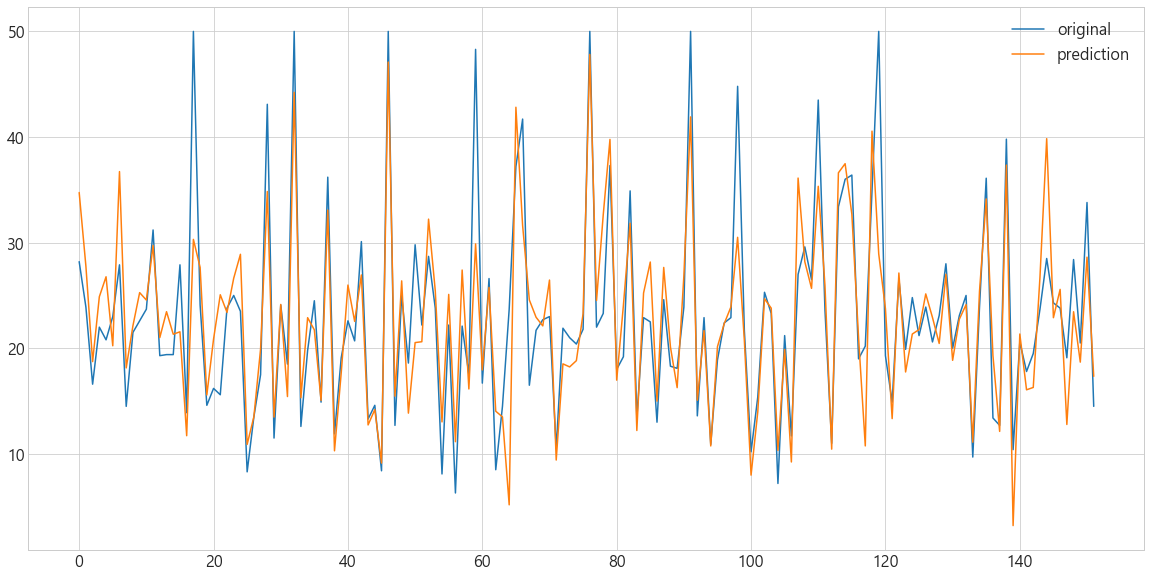

In [13]:
plt.plot(y_test.reset_index(drop=True), label='original') # 인덱스를 차례대로 해 주기 위해 reset_index
plt.plot(pred1, label='prediction')
plt.legend()
plt.show()